In [2]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import time
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import cv2
import torch.optim as optim
import random

In [12]:
#device="cuda" if torch.cuda.is_available() else "cpu"
#device="cpu"

In [2]:
# test=r'C:\Users\Ali\Desktop\test\test'
# train=r'C:\Users\Ali\Desktop\train\train'
# novtrain=r'C:\Users\Ali\Desktop\novtrain' no need 


In [3]:
# so I need to resize my images ( preprocessign) to feed to my neural network the properly formatted images
# def resize_image(image, target_size):
#     return cv2.resize(image, target_size)

7.336852550506592
1


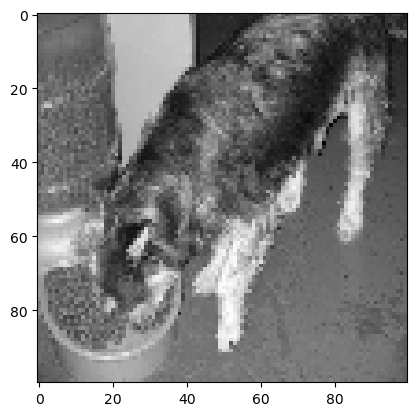

In [12]:
# s=time.time()
# storage=[]
# count=0
# for x in os.listdir(train):
#     path=os.path.join(train,x)
#     count+=1
#     storage.append(mpimg.imread(path))
    
# print(time.time()-s)
# plt.imshow(a)
# plt.show()

s=time.time()


cats=r'C:\Users\Ali\Desktop\cats'
dogs=r'C:\Users\Ali\Desktop\dogs'
def take(numberOfpics,path):
    output=[] #newstorage
    processed_paths = set()   # AI told me that sets are faster than lists, let's see ( now 500 pic=10 s) 
    try:
        pics=os.listdir(path)
        for i in range(numberOfpics):
            pic = np.random.choice(pics)  # I thought using np.shuffle is a much better option , does not work as expected
            path_to_pic=os.path.join(path,pic) #joining path to get */pic.png
            
            if path_to_pic in processed_paths: #check for dublicates
                continue 

            processed_paths.add(path_to_pic)
            image=cv2.imread(path_to_pic)
    
            grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #turning to gray, reducing data
            
            grayscale_image = cv2.resize(grayscale_image, (100, 100)) # resizing images to 50 by 50 
           
            if 'dogs' in path:            
                output.append([grayscale_image,1,path_to_pic]) # label 1 for dogs 
            else:
                output.append([grayscale_image,0,path_to_pic]) # label 0 for cats
            
                
    except Exception as e:
                      pass
    return      output          #newstorage

    
amount=500
minibatch=take(amount, dogs)

minibatch.extend(take(amount,cats))

print(time.time()-s) 

#np.random.shuffle(minibatch)

#np.save('training_data.npy',self.training_data)

plt.imshow(minibatch[1][0], cmap='gray')
print(minibatch[1][1])
# plt.show()

In [3]:
# print(minibatch[1][1],minibatch[1][2])
# plt.imshow(minibatch[0][0], cmap='gray')

In [127]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(500*500 , 64)
        self.fc2 = nn.Linear(64 , 64)
        self.fc3 = nn.Linear(64 , 64)
        self.fc4 = nn.Linear(64 , 1)
    def forward(self,x):
        
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        
        x = self.fc4(x)
             
        return   x

net=Net()

print(net)
#optimizer=optim.Adam(net.parameters(), lr=1e-3)

Net(
  (fc1): Linear(in_features=250000, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
# another attempt using tutorial from yutube, previous brain resulted in ~60% confidence

class Con(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,32 ,5)
        self.conv2=nn.Conv2d(32, 64,5)
        self.conv3=nn.Conv2d(64, 128,5)
        
        x=torch.randn(50,50).view(-1,1,50,50)
        self._to_linear= None
        self.convs(x)

    def convs(self,x):
        x= F.max_pool2d()
        # self.fc1=nn.Linear(, 512)
        # self.fc2=nn.Linear(512,2)



real class: 1 predicted: tensor(0.0555, grad_fn=<SelectBackward0>)


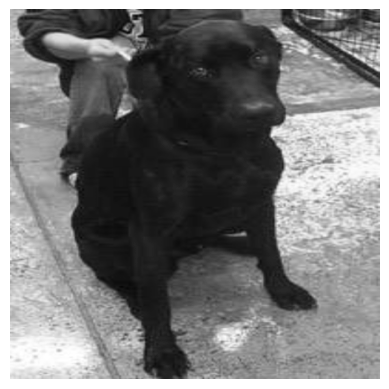

In [107]:
#making test data 
# test[0][2] , the first 0 is for the picture's numebr , the second is for what is inside it, if test[0][0] we get the picture, is test[0][[2] we get the path 
amount=10
test=take(amount, dogs)
test.extend(take(amount,cats))
np.random.shuffle(test)
plt.imshow(test[0][0], cmap='gray')


# passing to trained neural network
a=torch.from_numpy(test[0][0]).float()
a=a.view(-1,500*500)
a=net(a)
# probabilities = F.softmax(a, dim=1)
# predicted_prob, predicted_class = torch.max(probabilities, dim=1)

plt.axis('off')
print('real class:',test[0][1],'predicted:',a[0][0])

1

In [132]:
# criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=1e-2)

def trainer():
    # so model gets some output and we make backward propogtation to get the gradients that show us how parameters should be upgraded, then the optimizer updates these parameters. Before we begin teh new batch we clean the gradients 
    for n in range(len(minibatch)):    
        
        data = torch.from_numpy(minibatch[n][0]).float()
        inputs= data.view(-1,500*500) # flattening the data
        labels = torch.tensor([minibatch[n][1]], dtype=torch.float32)
        
        optimizer.zero_grad() #cleaing gradients from the previous batch
        
        outputs = net(inputs)
        
        # Compute softmax probabilities
        # probabilities = F.softmax(outputs, dim=1)
        
        # Get predicted class and predicted probability
        # predicted_prob, predicted_class = torch.max(probabilities, dim=1)
        
        print(labels)
        print(outputs[0][0].item())
        loss = criterion(outputs, labels) 
        
        loss.backward() # making gradients 
         
        optimizer.step() #updating parameters with gradients 
    
        # 'predicted prob:',predicted_prob 
        print('loss:', loss.item())    #, 'predicted class:', outputs[0][0] , 'real class:' ,minibatch[n][1] )
trainer()

tensor([0.])
-0.702627420425415
loss: 0.4936853051185608
tensor([0.])
5.6768670082092285
loss: 32.2268180847168
tensor([0.])
-1.291513442993164
loss: 1.6680070161819458
tensor([1.])
-0.04875289276242256
loss: 1.0998826026916504
tensor([1.])
-0.04436035826802254
loss: 1.0906885862350464
tensor([1.])
-0.03585861250758171
loss: 1.0730030536651611
tensor([1.])
-0.024127349257469177
loss: 1.0488368272781372
tensor([0.])
-0.0104952622205019
loss: 0.0001101505258702673
tensor([1.])
0.0024345088750123978
loss: 0.9951369166374207
tensor([0.])
0.019010303542017937
loss: 0.00036139163421466947
tensor([0.])
0.03351902216672897
loss: 0.001123524853028357
tensor([0.])
-2.070953130722046
loss: 4.288846969604492
tensor([1.])
0.29144421219825745
loss: 0.5020513534545898
tensor([1.])
4.74480676651001
loss: 14.023577690124512
tensor([1.])
0.7433885931968689
loss: 0.0658494159579277
tensor([1.])
0.09546990692615509
loss: 0.8181747198104858
tensor([0.])
0.10878606140613556
loss: 0.011834407225251198
tensor

In [ ]:
#preprocessing commented out not ot run accidentally

# copy=storage
# for i in range(len(copy)):
#     picture=copy[i]
#     picture=resize_image(picture,(500,500))
#     save_path = r'C:\Users\Ali\Desktop\novtrain\{}.png'.format(i)
#     plt.imsave(save_path, picture)


In [ ]:
# fig,ax= plt.subplots()
# ax.imshow(storage[10])
# ax.axis('off')
# plt.show()

In [ ]:
#pozor

# def take_random_80_20(numberOfpics):
    

#     train=[]
#     test=[]
    
#     pics=os.listdir(novtrain)  #novtrain comes from outside 

#     count1=0    
#     for i in range(25000):
#         i=np.random.randint(0,25000,1)[0]
#         count1+=1
#         path=os.path.join(novtrain,pics[i]) #joining path to get */pic.png
        
#         image=mpimg.imread(path)

#         grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#         train.append(grayscale_image)
        
#         if count1>=( numberOfpics - int(numberOfpics//1.25)) :
#                 break

#     count2=0
#     for i in range(25000):
        
#       #  i=np.random.randint(0,25000,1)[0] #taking a random number (turn on only if small data)
   
#         path=os.path.join(novtrain,pics[i]) #joining path to get */pic.png and taking a pic with a random number 
        
#         image=mpimg.imread(path) # converting image to numpy array 

#         grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #making image gray

#         if not any(np.array_equal(x, grayscale_image) for x in train + test):
            
#                 test.append(grayscale_image)  #checking if our image is not in test, or then there is no meaning in test and train
#                 count2+=1
#         if count2>=( numberOfpics - int(numberOfpics//1.25)) :  #checking if we do not exceed specified amount
#             break

#     return train,test





# train,test=take_random_80_20(250) # inside take is the number of pictures

In [ ]:
fig, axs = plt.subplots(1, 2)

# Display the first image in the first column
axs[0].imshow(train[9], cmap='gray')
axs[0].axis('off')

# Display the second image in the second column
axs[1].imshow(test[4], cmap='gray')
axs[1].axis('off')

# Show the plot
plt.show()


In [ ]:
# epochs= 5
# total=25000
# batch=total/100
#testdataset=np.random(len(cop))<0.8
#train=
#for epoch in range(epochs):
    # for batch in trainset:
    #     x,y=data
    #     net.zero_grad()
    #     output=net(x.view(-1,500*500))






    

In [ ]:
# class DogsVSCats():

#     cats=r'C:\Users\Ali\Desktop\cats'
#     dogs=r'C:\Users\Ali\Desktop\dogs'
    
#     labels={cats:0,dogs:1}
#     training_data=[]
#     #pay attention to balance
#     catcount=0
#     dogcount=0
#     def make_training_data(self):
#         for label in self.labels:
#             print(label)
#             for f in tqdm(os.listdir(label)):
#                  try:
#                     path=os.path.join(label,f)
#                     img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#                     img=cv2.resize(img,(self.Img_size,self.Img_size))
#                     self.training_data.append([np.array(img), np.eye(2)[self.labels[label]]) #np.eye makes a matrix with diagonal=1
#                     if label==self.cats:
#                         self.catcount+=1
#                     if label==self.dogs:
#                         self.dogcount+=1
#                  except Exception as e:
#                       pass
#              np.random.suffle(self.training_data)
#              np.save('training_data.npy',self.training_data)
#              print('dogs:', self.dogcount)
#              print('cats:', self.catcount)
# if rebuild_data:
#     dogsvcats=DogsVSCats()
    dogsvcats.make_training_data()
    


#training_data=np.load('training.npy',allow_pickle=True)


In [158]:
# Having been unsuccessfull with pytorch for quite some time, I 
# have decided to halt the attempts in there

# i will try svm to classify images to , mayhaps, satiate my hunger 

# i will then try pytorch and neural networks 
# preparing data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from skimage.feature import hog
import time

time1=time.time()
amount=300

data=take(amount, dogs)


data.extend(take(amount,cats))

#np.random.shuffle(minibatch)

#np.save('training_data.npy',self.training_data)

data_images=[x[0] for x in data] # this takes all first elemetns of lists inside data , which are arrays of pics
data_labels=[x[1] for x in data] # this takes all second elements of lists inside data, which are labels



hog_features=[]
for image in data_images:
    fd = hog(image, orientations=8, pixels_per_cell=(16, 16),
             cells_per_block=(1, 1), visualize=False)
    hog_features.append(fd)
    

hog_features = StandardScaler().fit_transform(hog_features)

#data_images_flat= [x.flatten() for x in data_images] # well, i found out that svm does not work with extra dims, got to reduce them now


#data_images_flat=StandardScaler().fit_transform(data_images_flat)

#data_images_flat instead of hog_features
x_train,x_test,y_train,y_test=train_test_split( hog_features ,data_labels, test_size=0.2, random_state=1)

from sklearn import svm

model_svm=svm.SVC() 

model_svm.fit(x_train , y_train )

model_svm.predict(x_test)

score=model_svm.score(x_test ,y_test)

print('SVM model score:', score)

#plt.imshow(data[0][0], cmap='gray')

#model_svm.fir()

print(time.time()-time1)
# without 

SVM model score: 0.6833333333333333
6.538327932357788


In [11]:
# grid search and standrad scaler 


# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1, 1, 10, 100],
#               'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#               'gamma': ['scale', 'auto']}

# grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)
# grid_search.fit(x_train_scaled, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# model_svm = grid_search.best_estimator_

# grid_search.score()

In [ ]:
from joblib import dump, load
dump(model_svm, 'my_svm_catvsdogs.joblib')

In [ ]:
loaded_model=load('my_svm_catvsdogs.joblib')

3200

In [243]:
# Having been unsuccessfull with pytorch for quite some time, I 
# have decided to halt the attempts in there

# i will try svm to classify images to , mayhaps, satiate my hunger 

# i will then try pytorch and neural networks 
# preparing data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from skimage.feature import hog
import time

time1=time.time()
amount=500

data_nn=take(amount, dogs)

data_nn.extend(take(amount,cats))

data_images_nn=[x[0] for x in data_nn] # this takes all first elemetns of lists inside data , which are arrays of pics
data_labels_nn=[x[1] for x in data_nn] # this takes all second elements of lists inside data, which are labels

x_train,x_test,y_train,y_test=train_test_split( data_images_nn ,data_labels_nn, test_size=0.2, random_state=1)

time.time()-time1

9.975440740585327

In [244]:
# the main mistake is using 500*500 images, it is typical to use images that are ten times less in size , not ten, a hundred in fact





import torch.nn as nn
import torch.nn.functional as F

class ImageClassifier(nn.Module):
    def __init__(self):
        super(ImageClassifier, self).__init__()
        
        # Define convolutional layers
        self.conv1 = nn.Conv2d(1, 120, kernel_size=3, stride=1, padding=0)
        self.conv2 = nn.Conv2d(120, 60, kernel_size=3, stride=1, padding=0)
        
        
        # Define fully connected layers
        self.fc1 = nn.Linear(60 * 11 * 11, 121)  # 121 = 11 by 11, 30 is feature maps , ( 11 from 11*11 matrix i get after conv ) Adjusted based on the output size of the last conv layer
        self.fc2 = nn.Linear(121, 2)  # Assuming binary classification
        
    def forward(self, x):
        # Apply convolutional layers with ReLU activation
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        
        # Flatten the output for the fully connected layers
        x = x.view(-1, 60 * 11 * 11)  # Adjusted based on the output size of the last conv layer
        
        # Apply fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
       
        return x



attemptik=ImageClassifier()


In [245]:
criterion= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(attemptik.parameters() , lr=0.0001)

In [214]:
training

tensor([ 0.0563, -0.0622], grad_fn=<SqueezeBackward0>)

In [246]:


for i in range(len(y_train)):
    if y_train[i] == 1:
        y_train[i] = [y_train[i], 0]
    else:
        y_train[i] = [y_train[i], 1]
        
for i in range(len(y_test)):
    if y_test[i] == 1:
        y_test[i] = [y_test[i], 0]
    else:
        y_test[i] = [y_test[i], 1]
        


In [247]:
x_train=torch.FloatTensor(np.array(x_train))
x_train=x_train.unsqueeze(1)
x_test=torch.FloatTensor(np.array(x_test))
x_test=x_test.unsqueeze(1)
y_train=torch.FloatTensor(np.array(y_train))
y_test=torch.FloatTensor(np.array(y_test))

In [249]:
############## TEST , written by AI
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)
        
dataset = CustomDataset(x_train, y_train)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

epoch = 20

for epoch in range(epoch):
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(dataloader):
        # Pass the batch to the model
        output = attemptik(data)

        # Calculate the loss
        loss = criterion(output, target)

        # Backpropagate the loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Print the average loss for the epoch
    print('Epoch: %d, Loss: %.3f' % (epoch+1, running_loss / len(dataloader)))

Epoch: 1, Loss: 0.570
Epoch: 2, Loss: 0.545
Epoch: 3, Loss: 0.540
Epoch: 4, Loss: 0.518
Epoch: 5, Loss: 0.508
Epoch: 6, Loss: 0.489
Epoch: 7, Loss: 0.477
Epoch: 8, Loss: 0.462
Epoch: 9, Loss: 0.459
Epoch: 10, Loss: 0.471
Epoch: 11, Loss: 0.439
Epoch: 12, Loss: 0.425
Epoch: 13, Loss: 0.434
Epoch: 14, Loss: 0.405
Epoch: 15, Loss: 0.396
Epoch: 16, Loss: 0.396
Epoch: 17, Loss: 0.383
Epoch: 18, Loss: 0.366
Epoch: 19, Loss: 0.349
Epoch: 20, Loss: 0.333


In [ ]:
epoch = 10
# I trained a model and got a loss 0f 0.7

batch=32
total_loss=0
train_loader=0
for i in range(epoch):
    for j in range(batch):
            train_loader+=1
            # passing data to the model
            training=attemptik(x_train[j])
            training=training.squeeze()
        
            #shape check
            print('shape check 1 ::',training.shape)
            #y_train = y_train.unsqueeze(1)
        
            # x_train turned out to be long so I have to convert target to long too 
            
            # shape check 2 
            print('shape check 2 ::', y_train[j].shape)
           
            loss=criterion(training, y_train[j]) 

        
            total_loss += loss.item()  #temp
            
            print('Epoch:', i, 'Loss:', total_loss / (train_loader))
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     


shape check 1 :: torch.Size([2])
shape check 2 :: torch.Size([2])
Epoch: 0 Loss: 0.714308500289917
shape check 1 :: torch.Size([2])
shape check 2 :: torch.Size([2])
Epoch: 0 Loss: 0.6771531701087952
shape check 1 :: torch.Size([2])
shape check 2 :: torch.Size([2])
Epoch: 0 Loss: 0.6466310024261475
shape check 1 :: torch.Size([2])
shape check 2 :: torch.Size([2])
Epoch: 0 Loss: 0.6211391538381577
shape check 1 :: torch.Size([2])
shape check 2 :: torch.Size([2])
Epoch: 0 Loss: 0.7273928761482239
shape check 1 :: torch.Size([2])
shape check 2 :: torch.Size([2])
Epoch: 0 Loss: 0.6756520768006643
shape check 1 :: torch.Size([2])
shape check 2 :: torch.Size([2])
Epoch: 0 Loss: 0.7353210193770272
shape check 1 :: torch.Size([2])
shape check 2 :: torch.Size([2])
Epoch: 0 Loss: 0.6964415013790131
shape check 1 :: torch.Size([2])
shape check 2 :: torch.Size([2])
Epoch: 0 Loss: 0.6685857872168223
shape check 1 :: torch.Size([2])
shape check 2 :: torch.Size([2])
Epoch: 0 Loss: 0.6458635121583939
s

In [138]:
print(testing, predicted_class) 

tensor([[ 1608.6184, -1600.1736]], grad_fn=<AddmmBackward0>) 0


In [238]:

# subject= x_test[12]
# testing= attemptik(subject)
# testing=testing.squeeze()
# probabilities = F.softmax(testing, dim=0)


# print(testing)
# # Get the index of the class with the highest probability
# predicted_class = torch.argmax(probabilities).item()

# print('PREDICTED CLASS:', predicted_class)

# plt.imshow(subject.squeeze() , cmap='gray')

# print('REAL LABEL:',y_test[12])
# loss=criterion(testing, y_test[12])
# print(loss)


for j in range(x_test.shape[0]):
            train_loader+=1
            # passing data to the model
            testing=attemptik(x_test[j])
            testing=training.squeeze()
            loss=criterion(testing, y_test[j])  
            total_loss += loss.item()  #temp
            
            print('Loss:', total_loss / (train_loader))
            
        
    

Loss: 0.49630115623555665
Loss: 0.49628956991603773
Loss: 0.4962779843205959
Loss: 0.49632926376066366
Loss: 0.49631767764896956
Loss: 0.4963689526444892
Loss: 0.49642022443602246
Loss: 0.4964086365684442
Loss: 0.49639704942490404
Loss: 0.4963854630053341
Loss: 0.49637387730966653
Loss: 0.49642514093914736
Loss: 0.49641355472785986
Loss: 0.4964019692403938
Loss: 0.49639038447668155
Loss: 0.4964416411858199
Loss: 0.4964300559066808
Loss: 0.4964813081750406
Loss: 0.49646972238069403
Loss: 0.49645813731000726
Loss: 0.4964465529629126
Loss: 0.49643496933934217
Loss: 0.4964862134518523
Loss: 0.4964746293132543
Loss: 0.4965258689871009
Loss: 0.49651428433369443
Loss: 0.4965027004037184
Loss: 0.49655393440159046
Loss: 0.49660516520023695
Loss: 0.49659357951787014
Loss: 0.49658199455890767
Loss: 0.4965704103232818
Loss: 0.4965588268109248
Loss: 0.4965472440217689
Loss: 0.4965356619557464
Loss: 0.4965240806127896
Loss: 0.49651249999283076
Loss: 0.49650092009580216
Loss: 0.4965521365589925
Loss:

F	 ImageClassifier	 StandardScaler	 amount	 attemptik	 cats	 criterion	 cv2	 data	 
data_images	 data_images_nn	 data_labels	 data_labels_nn	 data_nn	 dogs	 epoch	 fd	 hog	 
hog_features	 i	 image	 j	 loss	 minibatch	 model_svm	 mpimg	 nn	 
np	 optim	 optimizer	 os	 plt	 predicted_class	 probabilities	 random	 score	 
subject	 svm	 take	 test_label	 testing	 time	 time1	 torch	 total_loss	 
train_label	 train_loader	 train_test_split	 training	 x_test	 x_train	 y_test	 y_test_n	 y_train	 
y_train_n	 
